In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def pre_process(org_house_df):
    
    house_df = pd.DataFrame()
    
    org_house_df = org_house_df.fillna({'MSZoning' : 'RL'}) 
    house_df['MSZoning']= org_house_df['MSZoning'].map({'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}).astype(int)
    house_df['LandContour']= org_house_df['LandContour'].map({'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}).astype(int)
    house_df['Condition1']= org_house_df['Condition1'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNe': 7,
         'RRNn': 8}).astype(int)
    house_df['Condition2']= org_house_df['Condition2'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNn': 7}).astype(int)
    house_df['Neighborhood']= org_house_df['Neighborhood'].map({'Blmngtn': 0,
         'Blueste': 1,
         'BrDale': 2,
         'BrkSide': 3,
         'ClearCr': 4,
         'CollgCr': 5,
         'Crawfor': 6,
         'Edwards': 7,
         'Gilbert': 8,
         'IDOTRR': 9,
         'MeadowV': 10,
         'Mitchel': 11,
         'NAmes': 12,
         'NPkVill': 13,
         'NWAmes': 14,
         'NoRidge': 15,
         'NridgHt': 16,
         'OldTown': 17,
         'SWISU': 18,
         'Sawyer': 19,
         'SawyerW': 20,
         'Somerst': 21,
         'StoneBr': 22,
         'Timber': 23,
         'Veenker': 24}).astype(int)
    house_df['BldgType']= org_house_df['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}).astype(int)
    
    house_df['TotalBsmtSF'] = org_house_df['TotalBsmtSF']
    house_df['FlrSF'] = org_house_df['1stFlrSF'] + org_house_df['2ndFlrSF']
    house_df['GrLivArea'] = org_house_df['GrLivArea']
    
    house_df['HeatingQC']= org_house_df['HeatingQC'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    house_df['BedroomAbvGr']= org_house_df['BedroomAbvGr']
    
    org_house_df = org_house_df.fillna({'KitchenQual' : 'TA'}) 
    house_df['KitchenQual']= org_house_df['KitchenQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}).astype(int)
    
    house_df['TotRmsAbvGrd']= org_house_df['TotRmsAbvGrd']
    house_df['Fireplaces']= org_house_df['Fireplaces']
    
    org_house_df = org_house_df.fillna({'FireplaceQu' : 'Gd'}) 
    house_df['FireplaceQu']=org_house_df['FireplaceQu'].map({ 'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageType' : 'Attchd'}) 
    house_df['GarageType']=org_house_df['GarageType'].map({'2Types': 0,
         'Attchd': 1,
         'Basment': 2,
         'BuiltIn': 3,
         'CarPort': 4,
         'Detchd': 5}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageQual' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCond' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    house_df['OverallCond']=org_house_df['OverallCond']
    house_df['OverallQual']=org_house_df['OverallQual']
    
    return house_df
 

In [3]:
org_house_df = pd.read_csv('train.csv')

In [4]:
house_df = pre_process(org_house_df)

In [5]:
t = org_house_df['SalePrice'].values
x = house_df.values

In [6]:
t = t.astype('f')
x = x.astype('f')

In [7]:
t = t.reshape(len(t), 1)

In [8]:
dataset = list(zip(x, t))

In [9]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainer
import cupy

from chainer import training
from chainer.training import extensions
from chainer.optimizer import WeightDecay

/usr/local/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
n_train = int(len(dataset)*0.7)

In [11]:
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)

In [19]:
class NN(chainer.Chain):
    def __init__(self, n_mid_units1=10, n_mid_units2=5, n_out=1):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units1)
            self.fc2 = L.Linear(None, n_mid_units2)
            self.fc3 = L.Linear(None, n_out)
            
            self.bn = L.BatchNormalization(19)
        
    def __call__(self, x):
        h = self.bn(x)
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)

        return h

In [20]:
np.random.seed(0)
nn = NN()
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
batch_size = 10

In [21]:
train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

In [22]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [23]:
epoch = 100

In [24]:
trainer = training.Trainer(updater, (epoch, "epoch"), out="result/house_price")

trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, "epoch")))
trainer.extend(extensions.PrintReport(["epoch", "main/loss", "validation/main/loss"]))

In [25]:
trainer.run()

epoch       main/loss   validation/main/loss
1           4.02429e+10  3.6346e+10            
2           4.0032e+10  3.63424e+10           
3           4.02392e+10  3.63263e+10           
4           4.02183e+10  3.62705e+10           
5           3.9972e+10  3.61095e+10           
6           3.97808e+10  3.58145e+10           
7           3.93856e+10  3.52263e+10           
8           3.86639e+10  3.43781e+10           
9           3.75341e+10  3.32403e+10           
10          3.60431e+10  3.15368e+10           
11          3.44362e+10  2.95933e+10           
12          3.12288e+10  2.68227e+10           
13          2.88637e+10  2.43398e+10           
14          2.56821e+10  2.13108e+10           
15          2.21122e+10  1.74656e+10           
16          1.86267e+10  1.4431e+10            
17          1.52712e+10  1.16939e+10           
18          1.21875e+10  9.85319e+09           
19          9.26508e+09  6.85286e+09           
20          7.05028e+09  4.28425e+09         

In [26]:
import json

In [27]:
with open("result/house_price/log") as f:
    logs = json.load(f)

In [28]:
results = pd.DataFrame(logs)

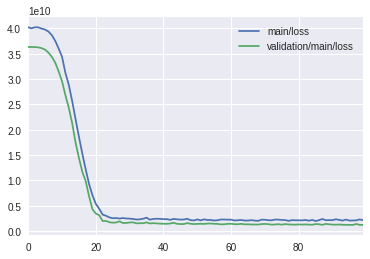

In [29]:
results[["main/loss", "validation/main/loss"]].plot()

In [57]:
chainer.serializers.save_npz("models/house_price_2.npz", model)

In [58]:
test_house_df = pd.read_csv('test.csv')

In [59]:
predict_df = pre_process(test_house_df)

In [60]:
x = predict_df.values

In [61]:
x = x.astype('f')

In [62]:
sale_prices = []

In [63]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    for i, x_ in enumerate(x):
        x_new = x_
        x_new = x_new[np.newaxis]
        y = model.predictor(x_new)
        sale_prices.append(y.data)

In [64]:
output_df = pd.DataFrame()

In [65]:
sale_prices = np.reshape(sale_prices, 1459)

In [66]:
output_df['Id'] = test_house_df['Id']
output_df['SalePrice'] = np.array(sale_prices)

In [67]:
output_df.head()

,Id,SalePrice
0,1461,103956.750000
1,1462,172953.406250
2,1463,155139.531250
3,1464,196321.703125
4,1465,214238.359375


In [68]:
output_df.to_csv('predict_20190109.csv')